In [1]:
    # Project Background: Heavy vehicle uses hydraulic APS (Air pressure system) braking systems. It’s a critical component for heavy vehicles and very expensive in
    # maintenance. The advantage of APS is that its easily available and has long term sustainability of natural air. The problem here is that this 
    # APS system requires regular maintenance i.e. every 1 month we need to test this system so that there is no fault in APS. To test this APS system 
    # it cost around 1 lakhs INR. So, the problem is that whenever the heavy vehicle goes for maintenance check irrespective of any problem or some other 
    # problem even if it is not APS problem, still the owner of vehicle must pay 1 lakh every month. So, this is problem we must study and analyze.
    # Company has given sensor data in tabular form and told us to identify whether its fault of APS or Non-APS. 
    
    # Problem Statement: To maintain the APS system is very expensive so we need to predict based on sensor data provided whether there is APS fault or 
    # Non -APS fault
    
    # Solution: So we need to do binary classification to predict if its APS fault or Non-APS fault based on the sensor data provided. In this case both
    # False positive (Actual- APS and system predicted -Non-APS) and False negative (Actual- Non-APS and system predicted -APS) is important & needs 
    # to be evaluated. We will creating own cost function to evaluate the problem.

In [3]:
import pandas as pd
import numpy as np

In [4]:
file = "data/train.csv"
df = pd.read_csv(file, na_values="na")
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [5]:
df.isnull().sum()

class         0
aa_000        0
ab_000    27896
ac_000     2141
ad_000     9200
          ...  
ee_007      379
ee_008      379
ee_009      379
ef_000     1730
eg_000     1729
Length: 171, dtype: int64

In [6]:
df.shape

(36188, 171)

In [7]:
# how many pos and neg

df['class'].value_counts()

neg    35188
pos     1000
Name: class, dtype: int64

In [8]:
# Problem 1 - data imbalance
# Problem 2 - Null values

In [9]:
# Write a code to display total number of numerical values and categrical columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 47.2+ MB


In [10]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != "O"]
cat_feature = [feature for feature in df.columns if df[feature].dtype == "O"]

print(f"we have {len(numeric_feature)} columns : {numeric_feature}")
print(f"we have {len(cat_feature)} columns : {cat_feature}")

we have 170 columns : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000',

In [11]:
# checking the missing values

df.isnull().sum()

class         0
aa_000        0
ab_000    27896
ac_000     2141
ad_000     9200
          ...  
ee_007      379
ee_008      379
ee_009      379
ef_000     1730
eg_000     1729
Length: 171, dtype: int64

In [12]:
!pip install seaborn --upgrade

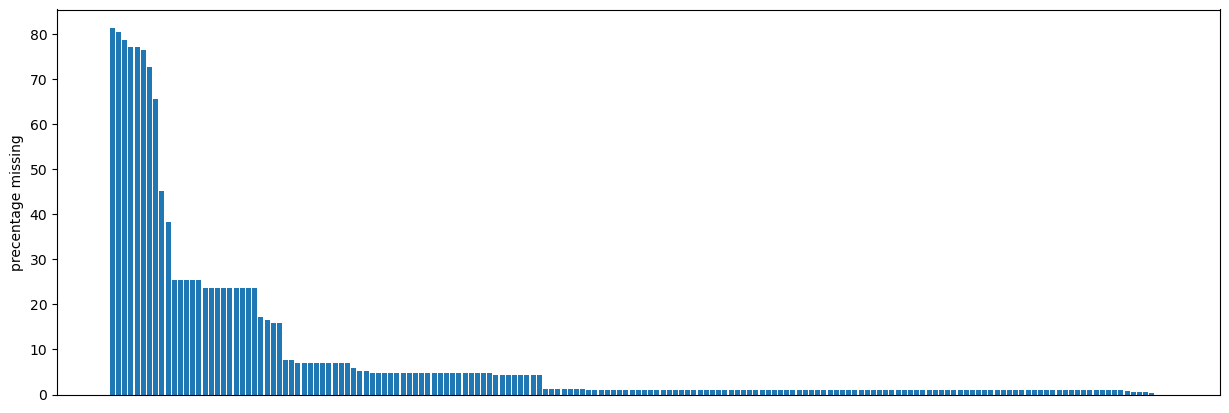

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, 
                                                                           ascending=False)
ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("precentage missing")
plt.show()

In [14]:
# thumb rule

# - 70 % missing - delete that column

In [15]:
dropcols = missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [16]:
# dropping the columns from the main dataset
df.drop(list(dropcols.index), axis=1, inplace=True)

In [17]:
df.shape

(36188, 164)

In [18]:
list(dropcols.index)

['br_000', 'bq_000', 'bp_000', 'ab_000', 'cr_000', 'bo_000', 'bn_000']

In [19]:
# find out the total missing values of a dataset

missing_value_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_value_count.sum()

print(f"precentage of missing data for entire dataset is {(total_missing/total_cells)*100} %")

precentage of missing data for entire dataset is 5.37059852747306 %


In [20]:
# reading task

# 1. Imbalance data
# 2. how we can balance the imbalance data

1000 35188


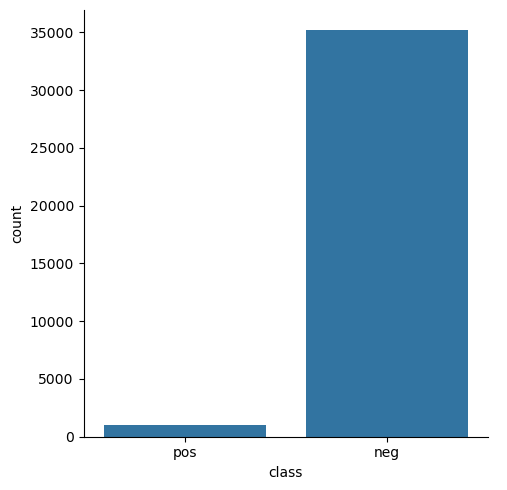

In [21]:
pos = df[df["class"]=="pos"].shape[0]
neg = df[df["class"]=="neg"].shape[0]
print(pos, neg)
sns.catplot(data=df, x="class", kind="count")


In [22]:
# splitting the data 
x = df.drop('class', axis=1)
y = df['class']

In [23]:
y = y.replace({"pos":1, "neg":0})

In [24]:
y

0        1
1        1
2        1
3        1
4        1
        ..
36183    0
36184    0
36185    0
36186    0
36187    0
Name: class, Length: 36188, dtype: int64

# brainstorming

1. impute
    - mean
    - median
    
2. fill with prev and after value

3. knn imputer

In [25]:
# Experiment 1 - knn imputer with robust scaling
df

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,11804.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,323436.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,1249396.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,8123016.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,0.0,0.0,0.0,55620.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,neg,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,neg,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,neg,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


# reading task

smotetomek - https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc


robustscaler - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [31]:
robust_scaler = RobustScaler()
X1 = robust_scaler.fit_transform(x)

In [27]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from statistics import mean

In [29]:
results = []
neig_knn = [2,3]
for k in neig_knn:
    pipeline = Pipeline(steps=[("imputer", KNNImputer(n_neighbors=k)),
                               ("model", LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring="accuracy", cv=2, n_jobs=-1)
    results.append(scores)
    print(f"n_neighbours = {k} || accuracy = {mean(scores)}")

/Users/afsankhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/afsankhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

n_neighbours = 2 || accuracy = 0.7317619100254228


/Users/afsankhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/afsankhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

n_neighbours = 3 || accuracy = 0.7396098154084227


In [33]:
# pipeline for KNN imputer with Robust scaler
knn_pipeline = Pipeline(steps=[
    ("imputer", KNNImputer(n_neighbors=3)),
    ("Robust", RobustScaler())
])

In [34]:
knn_pipeline

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('Robust', RobustScaler())])

In [35]:
X_knn = knn_pipeline.fit_transform(x)

In [36]:
# balance the data
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X_knn, y)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Random forest" : RandomForestClassifier(),
    "Decision tree" : DecisionTreeClassifier(),
    "logisitic Regression" : LogisticRegression(),
    "knn classifier" : KNeighborsClassifier(),
    "xgb" : XGBClassifier()
}

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
                            confusion_matrix


def evaluate_clf(true, predicted):
    
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)    
    pre = precision_score(true, predicted)    
    recall = recall_score(true, predicted)    
    roc = roc_auc_score(true, predicted)  
    
    return acc, f1, pre, recall, roc


def total_cost(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    
    return cost

In [50]:
from sklearn.model_selection import train_test_split

def evaluate_model(X, y, models):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
    cost_list = []
    model_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # training the model
        
        # make prediction
        y_test_pred = model.predict(X_test)
        
        acc, f1, pre, recall, roc = evaluate_clf(y_test, y_test_pred)
        
        # calculate the cost
        test_cost = total_cost(y_test, y_test_pred)
        
        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])
        
        print("Model performance for test Set")
        print(f"- Accuracy: {acc}")
        print(f"- f1 score: {f1}")        
        print(f"- precision score: {pre}")        
        print(f"- Recall: {recall}")        
        print(f"- roc: {roc}")
        print(f"- total cost : {test_cost}")
        
        cost_list.append(test_cost)
        
        print("="*35)
        print("\n")
        
    report = pd.DataFrame(list(zip(model_list, cost_list)), 
                               columns=["Model Name", 'Cost']).sort_values(by=["Cost"])
                          
    return report

In [46]:
# Experiment 1 - KNN Imputer and RobustScaler

report_knn = evaluate_model(X_res, y_res, models)

Random forest
Model performance for test Set
- Accuracy: 0.9910179640718563
- f1 score: 0.9910865874363327
- precision score: 0.9874541866365943
- Recall: 0.9947458108491906
- roc: 0.9910030228022075
- total cost : 19390


Decision tree
Model performance for test Set
- Accuracy: 0.9863130881094953
- f1 score: 0.9864176570458404
- precision score: 0.9828023681984775
- Recall: 0.9900596421471173
- roc: 0.9862980718608475
- total cost : 36220




/Users/afsankhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logisitic Regression
Model performance for test Set
- Accuracy: 0.5868263473053892
- f1 score: 0.6935279187817257
- precision score: 0.5524852569502948
- Recall: 0.9312695257029253
- roc: 0.5854458135242369
- total cost : 295120




/Users/afsankhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


knn classifier
Model performance for test Set
- Accuracy: 0.9756201881950385
- f1 score: 0.975986518747367
- precision score: 0.9652777777777778
- Recall: 0.9869355296790685
- roc: 0.9755748361249623
- total cost : 48500


xgb
Model performance for test Set
- Accuracy: 0.9954376960364985
- f1 score: 0.9954667799971668
- precision score: 0.9930751837196156
- Recall: 0.9978699233172394
- roc: 0.9954279476305637
- total cost : 7990




In [47]:
report_knn

,Model Name,Cost
4,xgb,7990
0,Random forest,19390
1,Decision tree,36220
3,knn classifier,48500
2,logisitic Regression,295120


In [49]:
# experiment 2 Median - Simple imputer and robust scaling

# pipeline for KNN imputer with Robust scaler
med_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("Robust", RobustScaler())
])

In [51]:
X_med = med_pipeline.fit_transform(x)

In [52]:
# balance the data
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X_med, y)

In [53]:
report_med = evaluate_model(X_res, y_res, models)

Random forest
Model performance for test Set
- Accuracy: 0.9918664383561644
- f1 score: 0.9919582392776525
- precision score: 0.9876387133024301
- Recall: 0.9963157148930141
- roc: 0.9918351099253115
- total cost : 13880


Decision tree
Model performance for test Set
- Accuracy: 0.9863727168949772
- f1 score: 0.9865388681372895
- precision score: 0.9813516545148626
- Recall: 0.9917812101459543
- roc: 0.9863346343875339
- total cost : 30330




/Users/afsankhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logisitic Regression
Model performance for test Set
- Accuracy: 0.6211472602739726
- f1 score: 0.7083699472759227
- precision score: 0.5783337817236123
- Recall: 0.9138444098058666
- roc: 0.6190863089408698
- total cost : 351020




/Users/afsankhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


knn classifier
Model performance for test Set
- Accuracy: 0.970105593607306
- f1 score: 0.9706438730470118
- precision score: 0.959950110864745
- Recall: 0.9815785744650701
- roc: 0.9700248095776995
- total cost : 67890


xgb
Model performance for test Set
- Accuracy: 0.9965753424657534
- f1 score: 0.9966096906342704
- precision score: 0.9935220391494156
- Recall: 0.9997165934533088
- roc: 0.9965532241587566
- total cost : 1460




In [54]:
report_med

,Model Name,Cost
4,xgb,1460
0,Random forest,13880
1,Decision tree,30330
3,knn classifier,67890
2,logisitic Regression,351020


In [56]:
# experiment 3 - Simple imputer Mean and robust scaling

# pipeline for KNN imputer with Robust scaler
mean_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("Robust", RobustScaler())
])

X_mean = mean_pipeline.fit_transform(x)

from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X_mean, y)

In [57]:
report_mean = evaluate_model(X_res, y_res, models)

Random forest
Model performance for test Set
- Accuracy: 0.991948699679373
- f1 score: 0.9920033967872055
- precision score: 0.9860720315137873
- Recall: 0.998006549907447
- roc: 0.9919439480854976
- total cost : 7990


Decision tree
Model performance for test Set
- Accuracy: 0.9847524047025293
- f1 score: 0.9848398979880986
- precision score: 0.9799802622303679
- Recall: 0.9897479709525844
- roc: 0.9847484863319681
- total cost : 37420




/Users/afsankhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logisitic Regression
Model performance for test Set
- Accuracy: 0.6775204845030282
- f1 score: 0.7400045955882352
- precision score: 0.6202214732787674
- Recall: 0.9171294318667236
- roc: 0.6773325425163623
- total cost : 330440




/Users/afsankhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


knn classifier
Model performance for test Set
- Accuracy: 0.9727823298895618
- f1 score: 0.9731892195395846
- precision score: 0.9595847750865052
- Recall: 0.9871849636907305
- roc: 0.9727710329006988
- total cost : 47920


xgb
Model performance for test Set
- Accuracy: 0.9960099750623441
- f1 score: 0.9960244214113304
- precision score: 0.9932040209542687
- Recall: 0.9988608856613983
- roc: 0.9960077388945896
- total cost : 4480




In [58]:
report_mean

,Model Name,Cost
4,xgb,4480
0,Random forest,7990
1,Decision tree,37420
3,knn classifier,47920
2,logisitic Regression,330440


In [26]:
# Experiment 4 - PCA with imputing median

from sklearn.decomposition import PCA

In [30]:
pca_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("Robust", RobustScaler())
])

In [32]:
x_pca = pca_pipeline.fit_transform(x)

In [34]:
var_ratio = {}
for n in range(2,150):
    pc = PCA(n_components=n)
    df_pca = pc.fit(x_pca)
    var_ratio[n] = sum(df_pca.explained_variance_ratio_)

<AxesSubplot:>

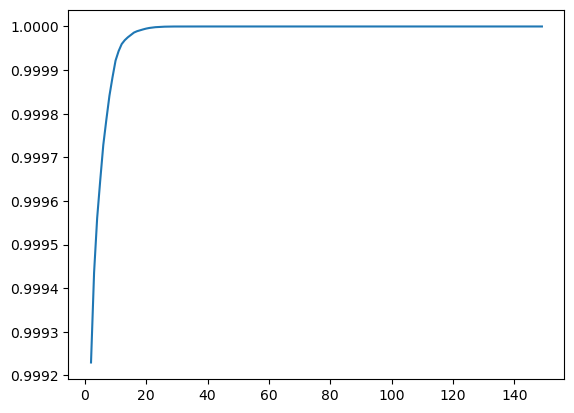

In [35]:
pd.Series(var_ratio).plot()

In [37]:
!pip install kneed

In [38]:
from kneed import KneeLocator

In [40]:
i = np.arange(len(var_ratio))
variance_ratio = list(var_ratio.values())
components = list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio)

<Figure size 500x500 with 0 Axes>

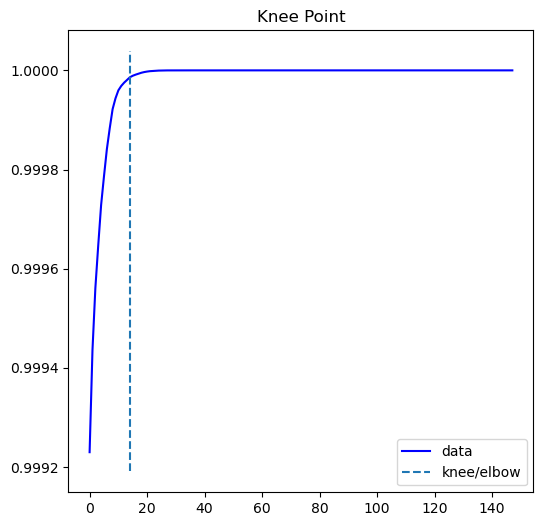

In [43]:
fig = plt.figure(figsize=(5,5))
knee.plot_knee()

In [45]:
pca_final = PCA(n_components=14).fit(x_pca)
reduced = pca_final.fit_transform(x_pca)

In [47]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(reduced, y)

In [52]:
report_pca = evaluate_model(X_res, y_res, models)

Random forest
Model performance for test Set
- Accuracy: 0.9789918978991898
- f1 score: 0.9789617290155813
- precision score: 0.9733009708737864
- Recall: 0.9846887187635418
- roc: 0.9790328559649144
- total cost : 54870


Decision tree
Model performance for test Set
- Accuracy: 0.9693123969312397
- f1 score: 0.9692351926394479
- precision score: 0.9646587494634425
- Recall: 0.9738552650585006
- roc: 0.9693450584973596
- total cost : 92970




/Users/afsankhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logisitic Regression
Model performance for test Set
- Accuracy: 0.8318634831863483
- f1 score: 0.807297230668091
- precision score: 0.9363324437666793
- Recall: 0.7095189946554962
- roc: 0.830983870904058
- total cost : 1008840




/Users/afsankhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


knn classifier
Model performance for test Set
- Accuracy: 0.9618555961855596
- f1 score: 0.9620433789954338
- precision score: 0.9505145918511209
- Recall: 0.9738552650585006
- roc: 0.9619418694313006
- total cost : 94010


xgb
Model performance for test Set
- Accuracy: 0.9689538968953897
- f1 score: 0.9689182398966334
- precision score: 0.9630422374429224
- Recall: 0.9748663874043045
- roc: 0.968996405547255
- total cost : 89590




In [53]:
report_pca

,Model Name,Cost
0,Random forest,54870
4,xgb,89590
1,Decision tree,92970
3,knn classifier,94010
2,logisitic Regression,1008840


In [65]:
from prettytable import PrettyTable

pt = PrettyTable()
pt.field_names=["Model", "Imputation_method", "Cost"]
pt.add_row(['xgb', "knn-imputer", 7990])
pt.add_row(['xgb', "median", 1460]) # winner
pt.add_row(['xgb', "mean", 4480])
pt.add_row(['Random foresT', "PCA", 54870])
print(pt)

++
||
++




++


In [67]:
# final Model and Report

final_model = XGBClassifier()

med_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("Robust", RobustScaler())
])
X_med = med_pipeline.fit_transform(x)

from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X_med, y)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=101)

In [77]:
final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [76]:
y_pred.

(14016,)

In [79]:
accuracy_score(y_pred, y_test)

0.9965753424657534

/Users/afsankhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


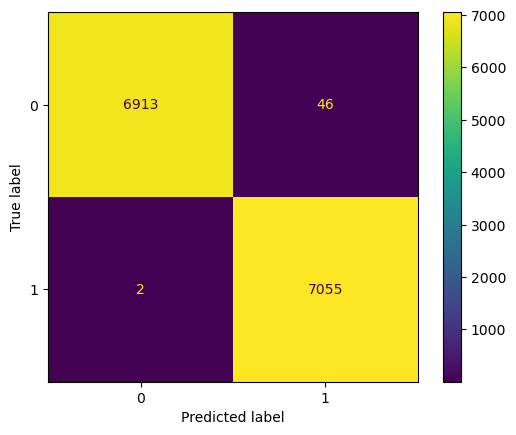

In [80]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(final_model, X_test, y_test,)